In [72]:
#import the standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [73]:
#load the dataset
data=pd.read_csv('/kaggle/input/bigmart-product-sales-factors/data.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [74]:
#checking the data shape
data.shape

(14204, 12)

In [75]:
#checking the data infromation 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [76]:
#Let's find the stastics in the data
data.describe().style.background_gradient(cmap='magma_r')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2099.333529
std,4.652502,0.051459,62.086938,8.371664,1542.432736
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,878.856000
50%,12.600000,0.054021,142.247000,1999.000000,1828.273366
75%,16.750000,0.094037,185.855600,2004.000000,2949.298043
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data cleaning Process 
- Firstly we check the null values if the data contains the null values replce with mean and mode values
- Then we also check the duplicate values in the data set, if it contains duplicate remove it.
- Checking the number of uniques values in the each categorical columns in the data set

In [77]:
#let's checking the null values 
null_val=data.isna().sum()
print(null_val)
for col in null_val[null_val >0].index:
    print(f'\n {col} {null_val[col]} null values')
    print('data type of {} is {}'.format(col,data[col].dtype))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 Item_Weight 2439 null values
data type of Item_Weight is float64

 Outlet_Size 4016 null values
data type of Outlet_Size is object


In [78]:
print('The mean of the first null columns is ',data['Item_Weight'].mean())
print('The mode of the second null column is ',data['Outlet_Size'].mode())

The mean of the first null columns is  12.792854228644284
The mode of the second null column is  0    Medium
Name: Outlet_Size, dtype: object


In [79]:
#fill the null values 
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [80]:
#let's checking the null values
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [81]:
#Checking the duplicate values 
duplicates=data[data.duplicated()]
print("Duplicate values in the data set is ",duplicates.shape[0])

Duplicate values in the data set is  0


In [82]:
#Checking the unique values in the objects columns 
for col in data.dtypes.index:
    if data[col].dtype=='object':
        print('\n Total unique values in the columns {} is '.format(col),data[col].nunique())
    


 Total unique values in the columns Item_Identifier is  1559

 Total unique values in the columns Item_Fat_Content is  5

 Total unique values in the columns Item_Type is  16

 Total unique values in the columns Outlet_Identifier is  10

 Total unique values in the columns Outlet_Size is  3

 Total unique values in the columns Outlet_Location_Type is  3

 Total unique values in the columns Outlet_Type is  4


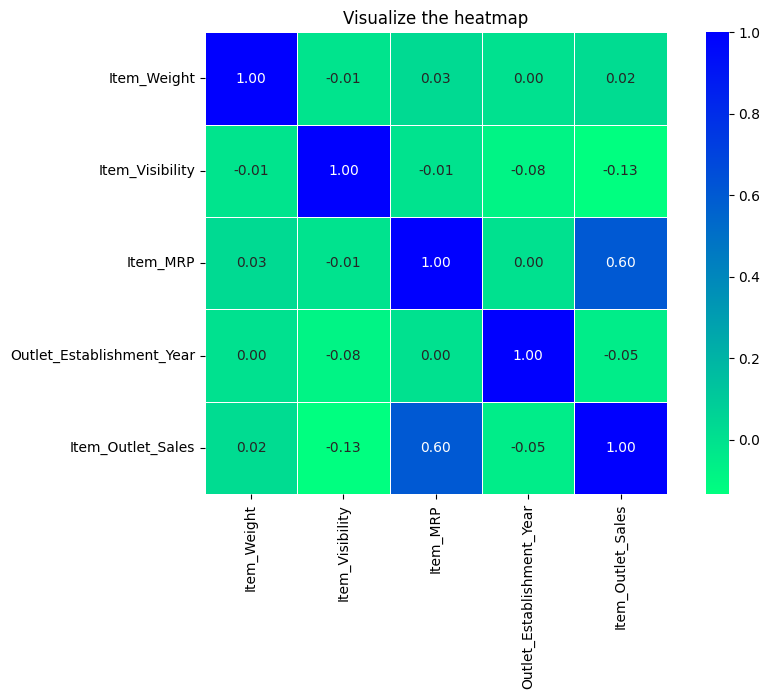

In [83]:
#Correlation heatmap using the 
corr=data.corr()
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='winter_r',fmt='.2f',
    square=True,
    linewidths=.5,ax=ax)
plt.title("Visualize the heatmap")
plt.show()

## Explore data Analysis (EDA
- For the frist steps we visualize the fat content in the data set using the pie chart with percentage

In [84]:
#Replace the values in in to single values
data.replace(to_replace=["LF", "low fat",'reg'],
           value=['Low Fat','Low Fat','Regular'],inplace=True)

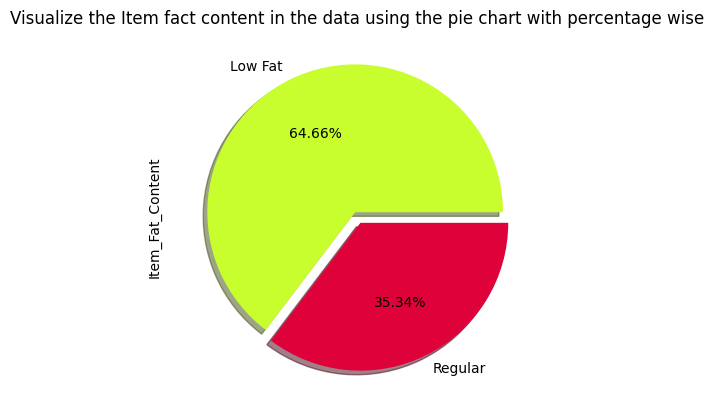

In [85]:
#Visualize the fact content in the data using the pie chart with differnt colors with percentages
data['Item_Fat_Content'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',explode=[0.03,0.05],
    labels=['Low Fat', 'Regular'],
    colors=['#C8FE2E','#DF013A'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Visualize the Item fact content in the data using the pie chart with percentage wise")
plt.show()

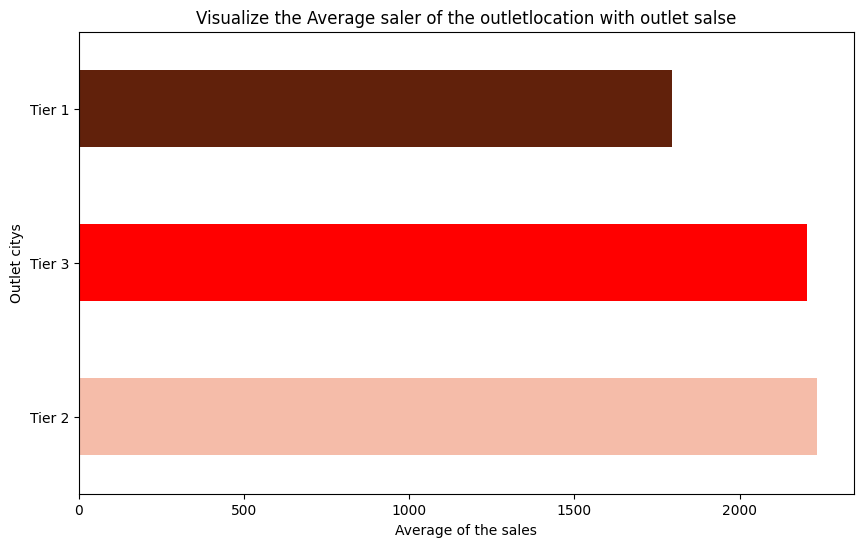

In [86]:
#Visualize the the average sales of the outlet location with outlest sales 
data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)\
.plot(kind='barh',figsize=(10,6),title="Visualize the Average saler of the outletlocation with outlet salse",color=['#F5BCA9','#FF0000','#61210B'])
plt.xlabel("Average of the sales")
plt.ylabel("Outlet citys")
plt.show()

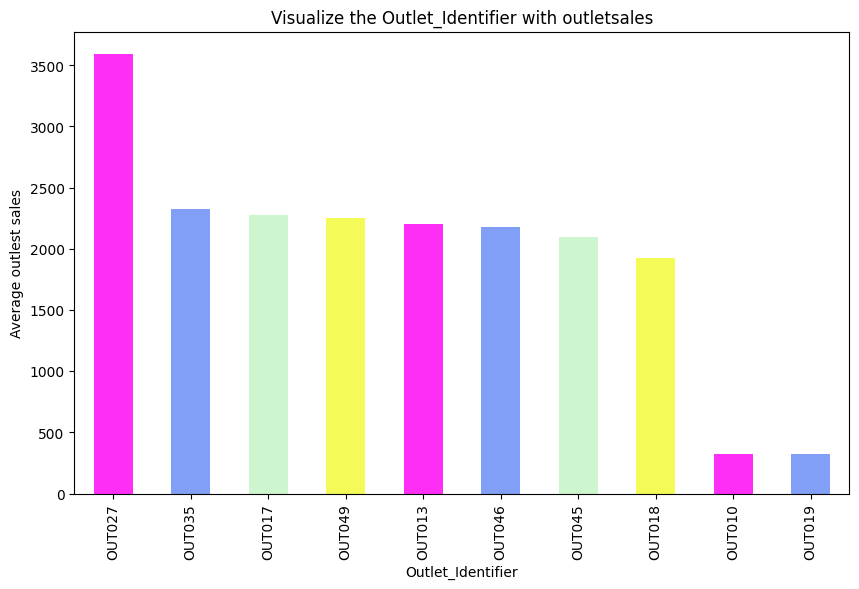

In [87]:
#Visualize the average outelet sales with outlete identifiers
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,6),title="Visualize the Outlet_Identifier with outletsales",color=['#FE2EF7','#819FF7','#CEF6CE','#F4FA58'])
plt.xlabel("Outlet_Identifier")
plt.ylabel("Average outlest sales")
plt.show()

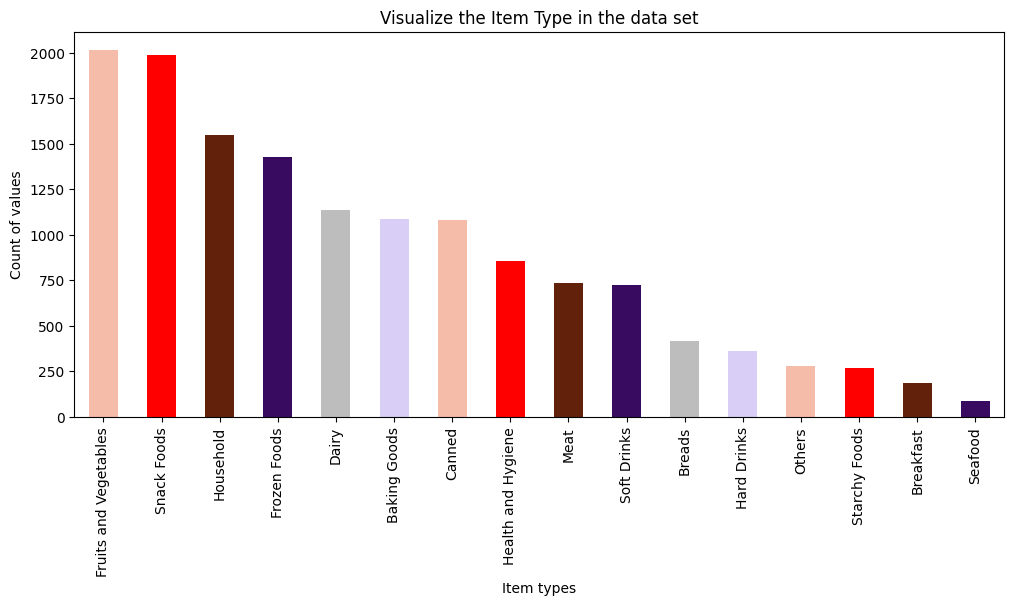

In [88]:
#Same way we visualize the item type in the data set using the bar charts
data['Item_Type'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(12,5),title="Visualize the Item Type in the data set",color=['#F5BCA9','#FF0000','#61210B','#380B61','#BDBDBD','#D8CEF6'])
plt.xlabel("Item types")
plt.ylabel("Count of values")
plt.show()

### Observations:
- From the above pie chart 65% items contains the low fat and remaing 35 % contains normal fat
- In the second bar chart Fruits and vegetables  snack food have same count in the chart
- in the above chart seafood have least values in the data

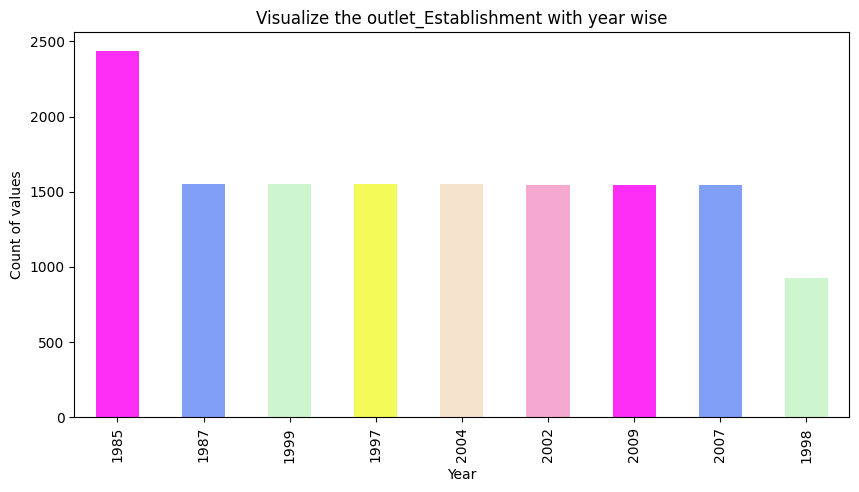

In [89]:
#Find the year wise outlet establishment 
data['Outlet_Establishment_Year'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title="Visualize the outlet_Establishment with year wise",figsize=(10,5),color=['#FE2EF7','#819FF7','#CEF6CE','#F4FA58','#F6E3CE','#F5A9D0'])
plt.xlabel("Year")
plt.ylabel("Count of values")
plt.show()

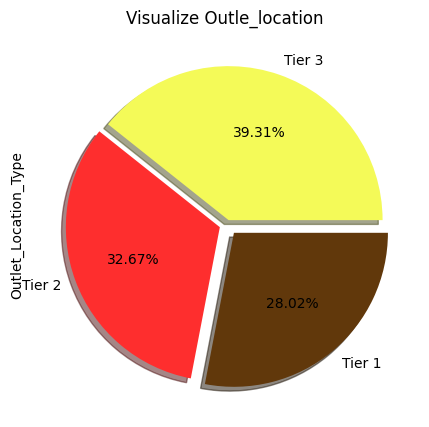

In [90]:
#Visualize the Outlet_Location_Type
data['Outlet_Location_Type'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(10,5),title='Visualize Outle_location ',
     explode=[0.03,0.05,0.07],
    labels=['Tier 3', 'Tier 2','Tier 1'],
    colors=['#F4FA58','#FE2E2E','#61380B'],
    autopct='%1.2f%%',
    shadow=True)
plt.show()

## Observations:
- From the above two chart we observe in the 1985 most of the outlet extablished.
- And remaing years have same values for outlet and 1989 have leaset values.
- From the Second chart tire 3 have more outlet locations, and secondly tire2 and tire 1 have leaset outlet citys

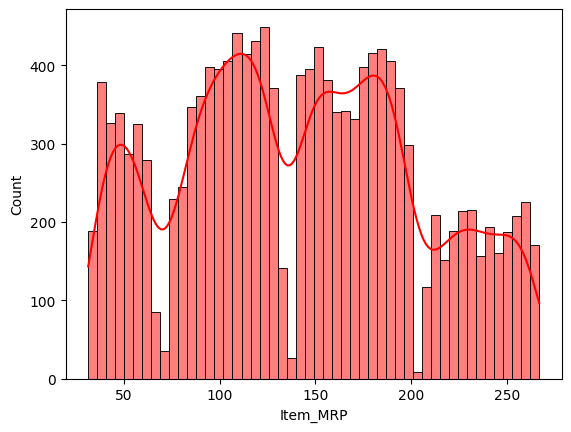

In [91]:
#Visuslize item Mrp price
sns.histplot(data=data,x='Item_MRP', bins=50, pthresh=.1, color='red',stat='count',kde=True)
plt.show()

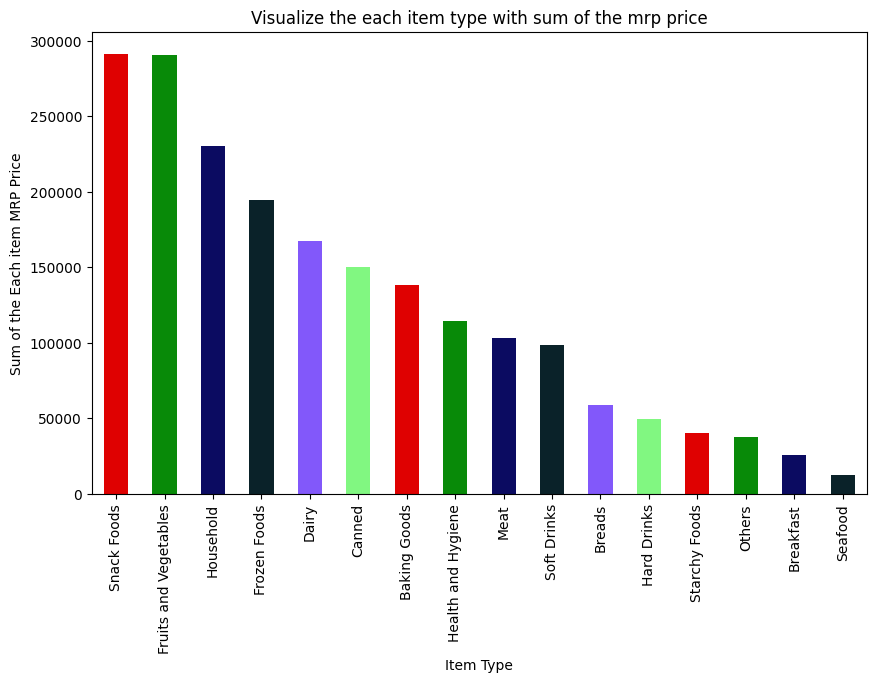

In [92]:
#Visualize the Sum of the each item type with Mrp Price
data.groupby('Item_Type')['Item_MRP'].sum().sort_values(ascending=False)\
.plot(kind='bar',title="Visualize the each item type with sum of the mrp price",figsize=(10,6),color=['#DF0101','#088A08','#0B0B61','#0A2229','#8258FA','#81F781'])
plt.xlabel("Item Type")
plt.ylabel("Sum of the Each item MRP Price")
plt.show()

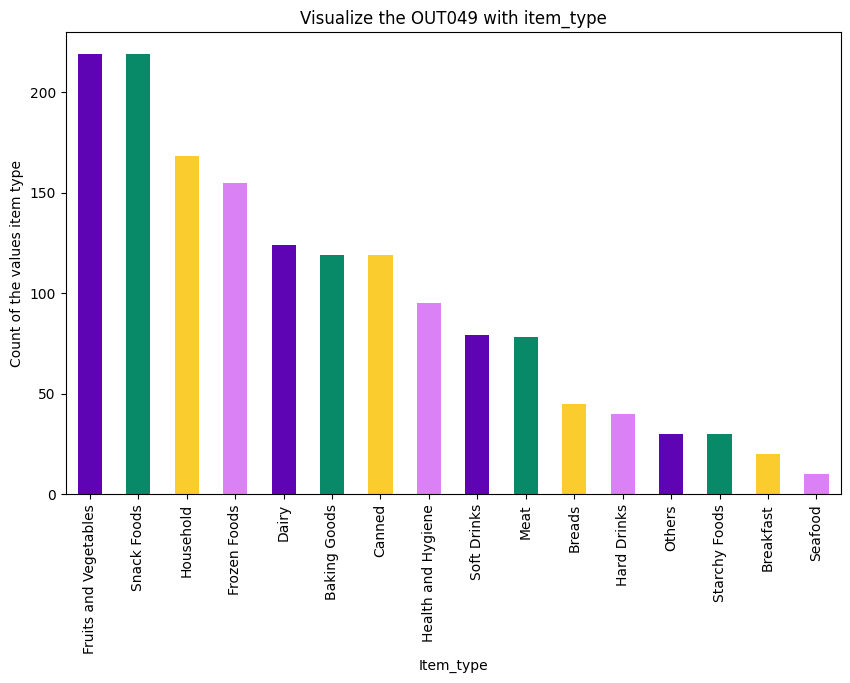

In [93]:
'''in the code  the Outlet_identifier values equal to the outo49 and loc the data with item_type 
and visualize with bar chart'''
OUT049=data['Outlet_Identifier']=='OUT049'
data.loc[OUT049]['Item_Type'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,6),title="Visualize the OUT049 with item_type",color=['#5F04B4','#088A68','#FACC2E','#DA81F5'])
plt.xlabel("Item_type")
plt.ylabel("Count of the values item type")
plt.show()


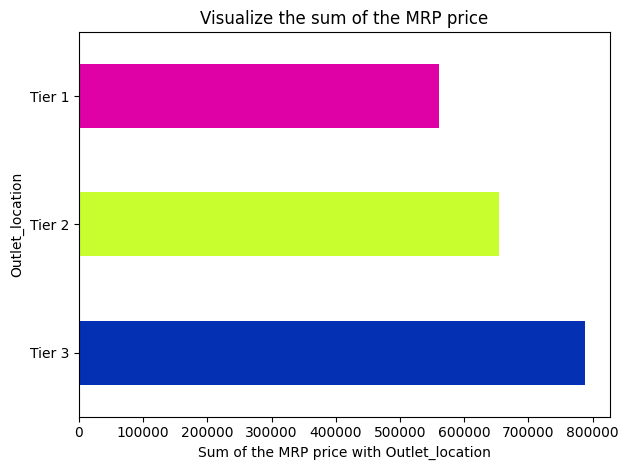

In [94]:
#Visualize the total amount of the each outletlocation with MRP Price visualize with barh charts
data.groupby('Outlet_Location_Type')['Item_MRP'].sum().sort_values(ascending=False)\
.plot(kind='barh',title="Visualize the sum of the MRP price",color=['#0431B4','#C8FE2E','#DF01A5'])
plt.xlabel("Sum of the MRP price with Outlet_location")
plt.ylabel("Outlet_location")
plt.tight_layout()
plt.show()

## Observations:
- In the First bar chats we groupby the items with item mrp price. In the bar char whe Sanck food have most profit and then next fruits and vegitable. And seafood have leaset sum of the mrp
- Coming to the Second chart in the code we outlet values equal to the OUT049 value and loc the function and visualize with bar chats
- In the bar chats fruits and vegitable have most used item in OUT049 and snacks food. and least seafood.
- The Thired chart we visualize the sum of the Mrp with outlet location. In the chart tire 3 get more amount compare to remaing.tire 1 is less amount compare to tire 2

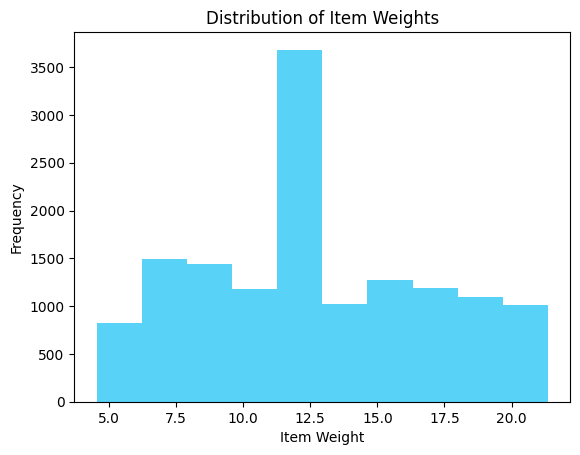

In [95]:
# Plot a histogram of item weights
plt.hist(data['Item_Weight'], bins=10,orientation='vertical',color='#58D3F7')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Item Weights')
plt.show()


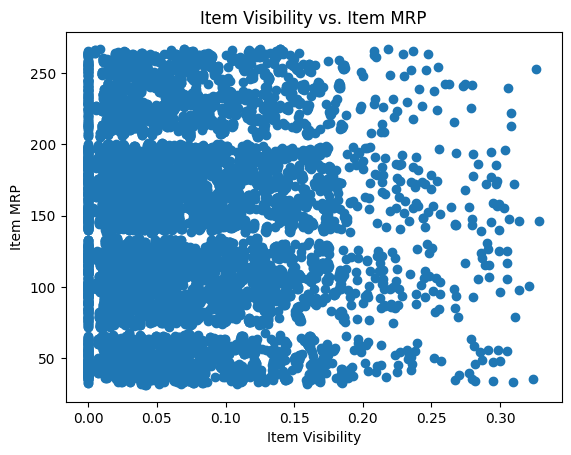

In [96]:
# Plot a scatter plot of item visibility vs. item MRP
plt.scatter(data['Item_Visibility'], data['Item_MRP'])
plt.xlabel('Item Visibility')
plt.ylabel('Item MRP')
plt.title('Item Visibility vs. Item MRP')
plt.show()

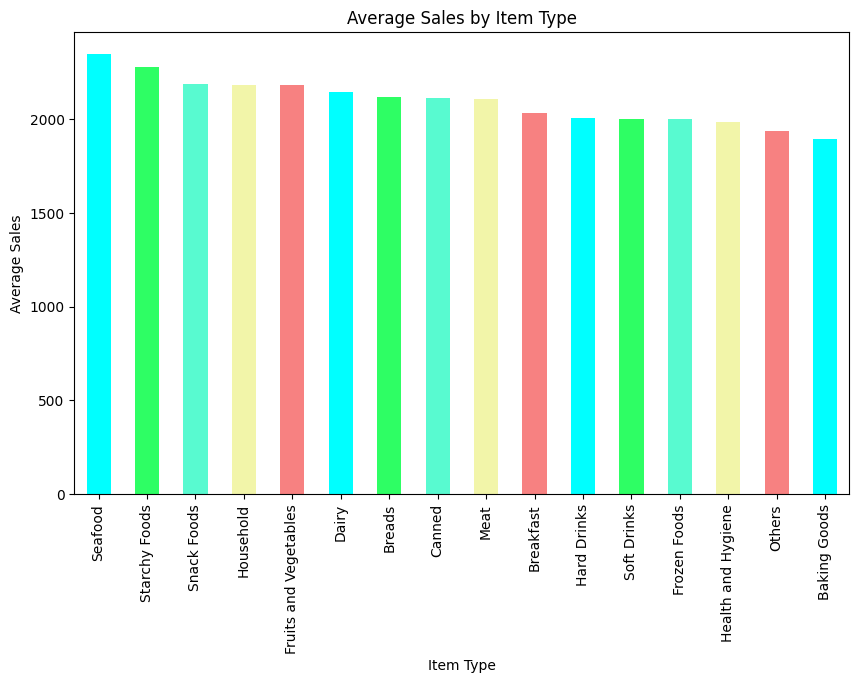

In [97]:
#Groupby the item type with outlet sales values with mean and visualize with bar chat
data.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)\
.plot(kind='bar',color=['#00FFFF','#2EFE64','#58FAD0','#F2F5A9','#F78181'],figsize=(10,6))
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.title('Average Sales by Item Type')
plt.show()


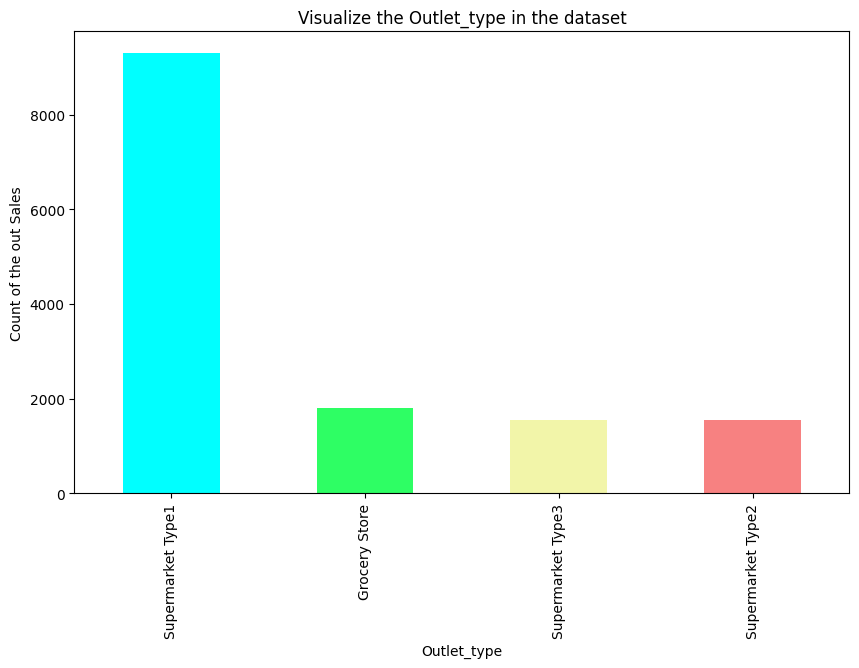

In [98]:
data['Outlet_Type'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',color=['#00FFFF','#2EFE64','#F2F5A9','#F78181'],figsize=(10,6))
plt.xlabel('Outlet_type')
plt.ylabel('Count of the out Sales')
plt.title('Visualize the Outlet_type in the dataset')
plt.show()

In [99]:
#The total sum of the item outlet sales
total_sum=data['Item_Outlet_Sales'].sum()
print(f'The Test_accuracy: {total_sum*0.01:.2f} Billons')

The Test_accuracy: 298189.33 Billons


In [100]:
current_year = 2023  # Assuming the current year is 2023
data['Years_Since_Established'] = current_year - data['Outlet_Establishment_Year']

# Machine Learning Modeling 
- First step we install all the required libraires
- Then Convert the all categorical columns into numerical using LabelEncoder
- Then divided into data indepent and dependent once we divide the normalize the data
- Then we split the data into train and test data once we split it test size is 25 % and 75 % we take as train set.
- We create a function for machine learning model buliding in the function we update all the values in the print it.
- Then apply the Regression algorithms to the model such as LinearRegression,RandomForestRegressor,DecisionTreeRegressor etc
- Finally we do the Hyperparameter tuning with models.


In [101]:
#import the all required libaries for machine Learning model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [102]:
#checking the categorical columns in the data types
categorical=[col for col in data.columns if data[col].dtype=='object']
categorical

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [103]:
#Convert the all the categorical columns into the numerical 
for col in data.select_dtypes(include='object').columns:
    labelencoder=LabelEncoder()
    labelencoder.fit(data[col].unique())
    data[col]=labelencoder.transform(data[col])
    print(f'{col}: {data[col].unique()}')

Item_Identifier: [ 156    8  662 ... 1323 1524 1519]
Item_Fat_Content: [0 1]
Item_Type: [ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
Outlet_Identifier: [9 3 0 1 5 7 2 8 6 4]
Outlet_Size: [1 0 2]
Outlet_Location_Type: [0 2 1]
Outlet_Type: [1 2 0 3]


In [104]:
#divided the data into dependent and independent variable
X=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']
#Normalize the data using the standardScaler and transorm the data into 0 to 1 range
scaler=StandardScaler()
X=scaler.fit_transform(X)
#Split the data into train and test data we takes 25 % for testing and 75 % for traing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=250)

In [105]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('Tree',DecisionTreeRegressor()))
models.append(('Random',RandomForestRegressor()))
models.append(('XGB',XGBRegressor()))

In [106]:
result=[]
model_names=[]
for name,model in models:
    cv_result=cross_val_score(model,X_train,y_train,cv=5,scoring='r2')
    result.append(cv_result)
    model_names.append(name)
    print(f"{name}: mean {cv_result.mean()} std {cv_result.std()}")

LR: mean 0.5819469396592365 std 0.00648761225375465
Tree: mean 0.36766495476347427 std 0.03295242097760628
Random: mean 0.6694883468993356 std 0.014979138153045255
XGB: mean 0.6547938644089315 std 0.018187601594550285


In [107]:
def model_buliding(model,X_train,X_test,y_train,y_test):
    #fit the train data to the model
    model.fit(X_train,y_train)
    # predict the test data for the model
    y_pred=model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_sqr=r2_score(y_test, y_pred)
    N=len(y_test)
    k=4
    adj_r2score=(1-r2_sqr)*(N-1)/(N-k-1)

    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('R2 score is {}'.format(r2))
    print('RMSE score is {}'.format(rmse))
    print('Adjusted r2_Score {}'.format(adj_r2score))

In [108]:
# APpply the Linear Regression model 
linear=LinearRegression()
model_buliding(linear,X_train,X_test,y_train,y_test)

MAE is 708.2759654556452
MSE is 963826.5712628014
R2 score is 0.5719541632400058
RMSE score is 981.7466940422063
Adjusted r2_Score 0.42852868598363775


In [109]:
#Apply DecisionTreeRegressor model
tree=DecisionTreeRegressor()
model_buliding(tree,X_train,X_test,y_train,y_test)

MAE is 787.009979819121
MSE is 1414322.8754856107
R2 score is 0.37188386714338717
RMSE score is 1189.2530746168416
Adjusted r2_Score 0.6288246676934506


In [110]:
#Apply the RandomForestRegressor model
random=RandomForestRegressor()
model_buliding(random,X_train,X_test,y_train,y_test)

MAE is 552.0362777445802
MSE is 753765.3769527366
R2 score is 0.665244618566889
RMSE score is 868.1966234400688
Adjusted r2_Score 0.33513299607657754


In [111]:
#Apply the RandomForestRegressor model
xgb=XGBRegressor()
model_buliding(xgb,X_train,X_test,y_train,y_test)

MAE is 559.9652531300427
MSE is 769606.8540858111
R2 score is 0.658209246709422
RMSE score is 877.2723944624105
Adjusted r2_Score 0.34217630405571114


In [112]:
from catboost import CatBoostRegressor
#Apply the RandomForestRegressor model
cat=CatBoostRegressor(learning_rate=0.01,iterations=5)
model_buliding(cat,X_train,X_test,y_train,y_test)

0:	learn: 1546.4988701	total: 4.29ms	remaining: 17.2ms
1:	learn: 1536.5889397	total: 7.19ms	remaining: 10.8ms
2:	learn: 1527.0929384	total: 10.2ms	remaining: 6.79ms
3:	learn: 1517.8678861	total: 12.5ms	remaining: 3.13ms
4:	learn: 1508.3296480	total: 16ms	remaining: 0us
MAE is 1152.2014798005503
MSE is 2112117.2370612193
R2 score is 0.061985820863445174
RMSE score is 1453.3125049559092
Adjusted r2_Score 0.9390722887576902


In [113]:
# Apply KNeighborsRegressor model
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
model_buliding(knn,X_train,X_test,y_train,y_test)

MAE is 613.1440274665075
MSE is 848977.7545518789
R2 score is 0.622959768725142
RMSE score is 921.3998885130598
Adjusted r2_Score 0.37746554456450815


# Hyperparmeter Turning with GridSearchCv

In [40]:
from sklearn.model_selection import GridSearchCV
# # Create a Random Forest Regressor object
# rf = RandomForestRegressor()

# # Define the hyperparameter grid
# param_grid = {
#     'max_depth': [3, 5, 7, 9],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# Print the best hyperparameters
# print("Best hyperparameters: ", grid_search.best_params_)

In [41]:
# Create a LinearRegression object
lr = LinearRegression()

# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True,False],
    'copy_X': [True,False],
    'n_jobs': [10,20,50,100,250,400,500]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 10}


In [42]:
# #Apply the LinearRegression model
lr_1=LinearRegression(**{'copy_X': True, 'fit_intercept': True, 'n_jobs': 10})
model_buliding(lr_1,X_train,X_test,y_train,y_test)

MAE is 710.3153683912583
MSE is 972848.8468473266
R2 score is 0.5814609301158973
RMSE score is 986.3310026797934
Adjusted r2_Score 0.4191293929727968


In [ ]:
# Create a LinearRegression object
tree = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['absolute_error','friedman_mse'],
    'splitter': ['best','random'],
    'max_depth': [10,20,50,100,250,400,500],
    'min_samples_split':[20,50,100,200,500],
    'max_features':['auto','sqrt','log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

In [ ]:
# #Apply the DecisionTreeRegressor model
tree_1=LinearRegression(**{'copy_X': True, 'fit_intercept': True, 'n_jobs': 10})
model_buliding(tree_1,X_train,X_test,y_train,y_test)

## Conclusion:
- From the Above model we get good score for catboostRegressor get good score
- After apply the hyperparameter turning linerregressuib get good score